# Heart Disease Classification

## source information
- https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Detail about the data set

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.
In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

**Attribute Information (Only 14 attributes used) :**
1. age : age in years
2. sex : sex (1 = male; 0 = female)
3. cp : chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic
4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)
5. chol : serum cholestoral in mg/dl
6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg : resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach : maximum heart rate achieved
9. exang : exercise induced angina (1 = yes; 0 = no)
10. oldpeak : ST depression induced by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
        - Value 1: upsloping
        - Value 2: flat
        - Value 3: downsloping
12. ca : number of major vessels (0-3) colored by flourosopy
13. thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target : diagnosis of heart disease (angiographic disease status)
        - Value 0: < 50% diameter narrowing
        - Value 1: > 50% diameter narrowing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.preprocessing import StandardScaler, PowerTransformer, binarize, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format='svg'

pd.set_option('display.max_rows', 100)

## Load data

In [2]:
url = 'https://github.com/lujing-dax/datascience/raw/main/processed.cleveland.data.csv'
df = pd.read_csv(url, na_values='?')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


## Cleansing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [6]:
# binarize target to bin_target for binary classification
df['bin_target'] = binarize(df[['target']], threshold=0)

## Data exploration

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin_target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin_target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461,0.424052


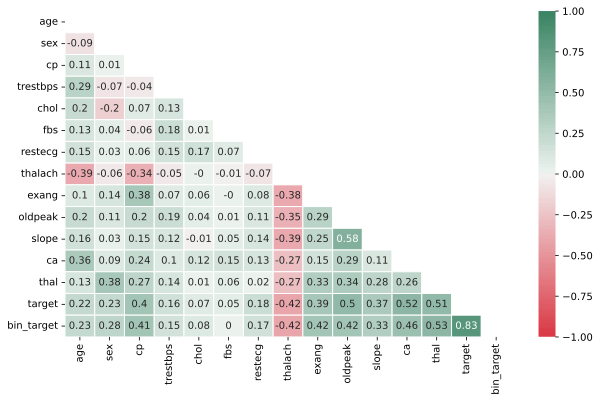

In [9]:
dcorr = df.corr().round(2)
mask = np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)] = 1

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10,150,n=100),
           vmin=-1, vmax=1, center=0, linewidths=1,
            annot=True, mask=mask, ax=ax);

In [10]:
def plot_mn(df, cols, n_rows:int=1) :
    n = len(cols)
    n_cols = np.ceil(n/n_rows).astype(int)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*3))
    ax = ax.ravel()
    fig.tight_layout()
    for i, c in enumerate(cols):
        sns.histplot(data=df[c], kde=True, ax=ax[i])

#### Look at the distribution of the data.

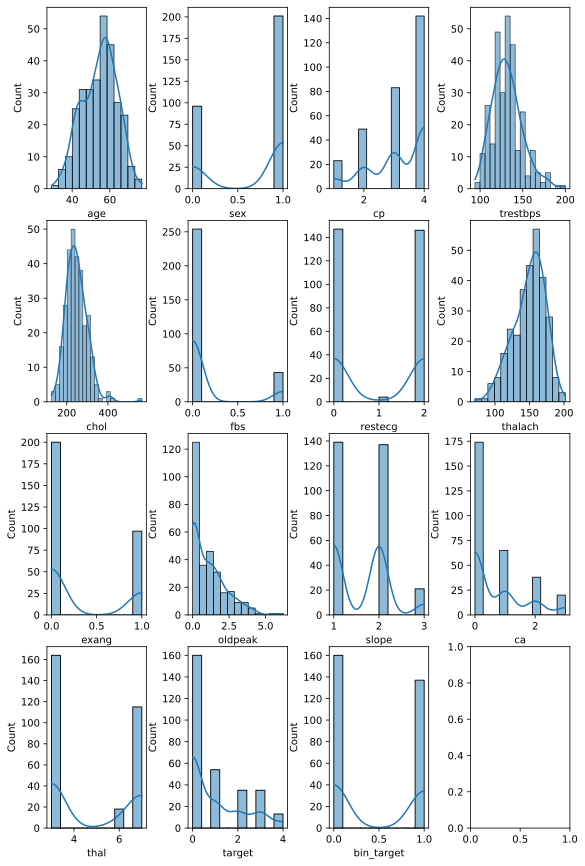

In [11]:
plot_mn(df, df.columns, 4)

#### Check the number of people who has heart disease

In [12]:
df_target = df.groupby('bin_target').size()
df_target

bin_target
0    160
1    137
dtype: int64

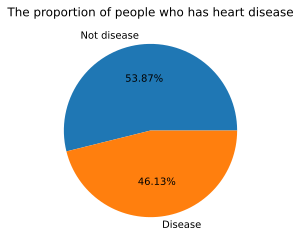

In [13]:
plt.pie(df_target.values, labels=['Not disease', 'Disease'], autopct='%.2f%%');
plt.title('The proportion of people who has heart disease');

## Implement machine learning

In [14]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

numeric_transformer = Pipeline(steps=[
    ('scaler', PowerTransformer(method='yeo-johnson', standardize=True))
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [15]:
def run_models_score(X, y, X_train, X_test, y_train, y_test):
    models = [
        [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
        [KNeighborsClassifier(), 'KNeighborsClassifier'],
        [SVC(kernel='linear'), 'SVC'],
        [MLPClassifier(), 'MLPClassifier'],
        [GaussianNB(), 'GaussianNB'],
        [GaussianProcessClassifier(), 'GaussianProcessClassifier'],
        [DecisionTreeClassifier(), 'DecisionTreeClassifier'],
        [RandomForestClassifier(), 'RandomForestClassifier'],
        [ExtraTreesClassifier(), 'ExtraTreesClassifier'],
        [GradientBoostingClassifier(), 'GradientBoostingClassifier']
    ]

    model_scores = []
    
    for m in models:
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', m[0])
        ])
        
        clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=777)
        accuracy = cross_val_score(clf, X, y, cv=cv)
        model_scores.append([m[1], train_score, test_score, accuracy.mean()])
        
        dModelsScore = pd.DataFrame(model_scores, columns=['Model', 'Train Score', 'Test Score', 'Accuracy Mean'])
        dModelsScore.sort_values(by=['Accuracy Mean','Train Score', 'Test Score'], ascending=False, inplace=True)
        dModelsScore.reset_index(drop=True, inplace=True)
        
    return dModelsScore

In [16]:
def run_models_score_with_rfe(X, y, X_train, X_test, y_train, y_test, rfe:RFE):
    models = [
        [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
        [KNeighborsClassifier(), 'KNeighborsClassifier'],
        [SVC(kernel='linear'), 'SVC'],
        [MLPClassifier(), 'MLPClassifier'],
        [GaussianNB(), 'GaussianNB'],
        [GaussianProcessClassifier(), 'GaussianProcessClassifier'],
        [DecisionTreeClassifier(), 'DecisionTreeClassifier'],
        [RandomForestClassifier(), 'RandomForestClassifier'],
        [ExtraTreesClassifier(), 'ExtraTreesClassifier'],
        [GradientBoostingClassifier(), 'GradientBoostingClassifier']
    ]
    
    model_scores = []
    
    for m in models:
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('rfe', rfe),
            ('classifier', m[0])
        ])
        
        clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=777)
        accuracy = cross_val_score(clf, X, y, cv=cv)
        model_scores.append([m[1], train_score, test_score, accuracy.mean()])
        
        dModelsScore = pd.DataFrame(model_scores, columns=['Model', 'Train Score', 'Test Score', 'Accuracy Mean'])
        dModelsScore.sort_values(by=['Accuracy Mean','Train Score', 'Test Score'], ascending=False, inplace=True)
        dModelsScore.reset_index(drop=True, inplace=True)
        
    return dModelsScore

In [17]:
X = df.drop(['target','bin_target'], axis=1) # features values
y = df['bin_target']

#split to train/test data sets
test_ratio = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, stratify=y, random_state=777)

run_models_score(X, y, X_train, X_test, y_train, y_test)

,Model,Train Score,Test Score,Accuracy Mean
0,LogisticRegression,0.869565,0.822222,0.844674
1,ExtraTreesClassifier,1.000000,0.788889,0.829425
2,MLPClassifier,0.903382,0.822222,0.827893
3,GaussianNB,0.811594,0.788889,0.824674
4,RandomForestClassifier,1.000000,0.788889,0.823295
5,KNeighborsClassifier,0.874396,0.777778,0.820230
6,GaussianProcessClassifier,0.995169,0.766667,0.818966
7,SVC,0.879227,0.822222,0.817854
8,GradientBoostingClassifier,1.000000,0.777778,0.795441
9,DecisionTreeClassifier,1.000000,0.666667,0.698774


### Find out the importance of features

In [18]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X_train, y_train)
coef = estimator.coef_
coef

array([[-0.01783672,  0.39563865,  0.31213421,  0.00370734,  0.0037997 ,
        -0.06508955,  0.04636625, -0.03668062,  0.52121828,  0.51797023,
         0.24293306,  1.0545615 ,  0.42944882]])

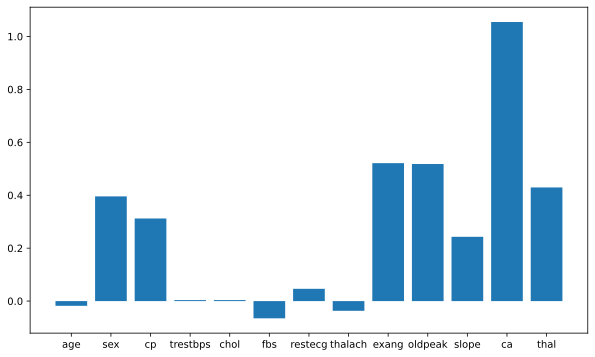

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar([x for x in X.columns], coef[0]);

There are 7 features that stand out from the others.

## Using RFE (Recusive Feature Elimination)

In [22]:
rfe = RFE(estimator=estimator, n_features_to_select=7, step=1)
rfe.fit(X_train, y_train)
sel_cols = np.array(X.columns)[rfe.support_]

dRFE = pd.DataFrame({'Rank':rfe.ranking_, 'Feature':X.columns})
print(f'Selected features : {sel_cols}')
dRFE.sort_values('Rank').reset_index(drop=True)

Selected features : ['sex' 'cp' 'exang' 'oldpeak' 'slope' 'ca' 'thal']


,Rank,Feature
0,1,sex
1,1,cp
2,1,exang
3,1,oldpeak
4,1,slope
5,1,ca
6,1,thal
7,2,fbs
8,3,restecg
9,4,thalach


### Test and score the models after using RFE

In [23]:
run_models_score_with_rfe(X, y, X_train, X_test, y_train, y_test, rfe)

,Model,Train Score,Test Score,Accuracy Mean
0,LogisticRegression,0.855072,0.811111,0.842567
1,SVC,0.859903,0.844444,0.842567
2,MLPClassifier,0.864734,0.833333,0.834751
3,GaussianProcessClassifier,0.859903,0.811111,0.834713
4,GradientBoostingClassifier,0.884058,0.800000,0.824483
5,RandomForestClassifier,0.884058,0.766667,0.814713
6,KNeighborsClassifier,0.859903,0.777778,0.813602
7,ExtraTreesClassifier,0.884058,0.788889,0.805709
8,DecisionTreeClassifier,0.884058,0.833333,0.805709
9,GaussianNB,0.830918,0.788889,0.803372


### Calculate the accuracy score

In [24]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfe', rfe),
    ('classifier', estimator)
])

pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print(f'accuracy score = {accuracy_score(y_test, y_hat)}')

accuracy score = 0.8111111111111111


### Plot confusion matrix

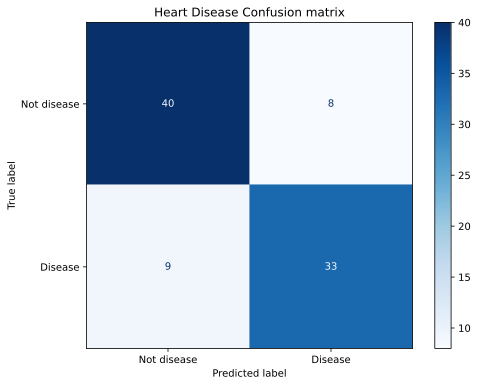

In [25]:
#target_names = ['Not disease', 'Disease (1)', 'Disease (2)', 'Disease (3)', 'Disease (4)']
target_names = ['Not disease', 'Disease']

fig, ax = plt.subplots(figsize=(8,6))
disp = plot_confusion_matrix(pipe, X_test, y_test,
                            display_labels=target_names,
                            cmap=plt.cm.Blues, ax=ax)
disp.ax_.set_title("Heart Disease Confusion matrix");

In [26]:
# classification report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.80      0.79      0.80        42

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [27]:
y_predicted = pipe.predict(X)
df['predicted'] = y_predicted
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin_target,predicted
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,1,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,1


## Conclusion

After testing for classifying to find out that, according to all 13 features above, we were able to predict whether a patient had heart disease or not. but all We can reduce the amount of data we have to keep. to be used in future models. By choosing only 7 important data features sex, chest pain type, fasting blood sugar, exercise-induced angina, ST depression induced by exercise relative to rest, which will result in not much difference in classification results